In [64]:
from numba.core.extending import get_cython_function_address
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

main_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/CLEAN/" 
BSRN_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/"



In [65]:
ghi =  ['GHIP_SI02pt100',
        'GHIP_SMP11',
        'GHIP_SMP22',
        'GHIP_SPN1',
        'GHIT_SMP22']

kt =  ['kt_GHIP_SI02pt100',
       'kt_GHIP_SMP11',
       'kt_GHIP_SMP22',
       'kt_GHIP_SPN1',
       'kt_GHIT_SMP22']

gti = ['TGHIP_SI02pt100', 
       'TGHIP_SI02pt100_dirty',
       'TGIP_SMP11_VENT']
      
fghi = ['F_GHIP_SI02pt100', 
        'F_GHIP_SMP11', 
        'F_GHIP_SMP22', 
        'F_GHIP_SPN1', 
        'F_GHIT_SMP22']

In [66]:
months = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
          '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
          '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
          '2021-01']

years = ['2018', '2019', '2020', '2021']


In [67]:
solar_constant = 1366.1


In [68]:
year = years[0]

In [69]:
year

'2018'

In [70]:
dfghi = pd.read_pickle(BSRN_path + year +'ghiFLAG.pkl')
       #dfghi['sumflags']= dfghi.iloc[:,4:8].sum(axis=1)
       
dfgti = pd.read_pickle(main_path+year+'GTI.pkl')
dfgti = dfgti.resample('1Min').mean()  # use in case of 1 min span

eth   = pd.read_pickle(BSRN_path + year + 'ETH.pkl')

In [73]:
       eth.rename(columns= {0: "eth"}, inplace=True)


In [45]:
eth.shape

(525201, 1)

In [46]:
dfghi.shape

(525201, 15)

In [19]:
eth.shape


(3, 1)

In [24]:
dfghi= dfghi.head(3)

In [26]:
dfghi

,PPmax,PPmin,ERmax,ERmin,F_GHIP_SI02pt100,F_GHIP_SMP11,F_GHIP_SMP22,F_GHIP_SPN1,F_GHIT_SMP22,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,sumflags
2018-01-01 00:00:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,0.006883,-2.200000,0.3,1.375917,-0.006667,NaN
2018-01-01 00:01:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,0.006883,-2.183333,0.3,1.518967,0.000000,NaN
2018-01-01 00:02:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,-0.010817,-2.185000,0.3,1.609700,0.000000,NaN


In [27]:
eth =eth.head(3)

In [17]:
eth

,eth
2018-01-01 00:00:00+00:00,1412.893619
2018-01-01 00:01:00+00:00,1412.893649
2018-01-01 00:02:00+00:00,1412.893678


In [47]:
       dfghi[kt] = dfghi[ghi]

In [48]:
dfghi.shape

(525201, 20)

In [49]:
dfghi

,PPmax,PPmin,ERmax,ERmin,F_GHIP_SI02pt100,F_GHIP_SMP11,F_GHIP_SMP22,F_GHIP_SPN1,F_GHIT_SMP22,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,sumflags,kt_GHIP_SI02pt100,kt_GHIP_SMP11,kt_GHIP_SMP22,kt_GHIP_SPN1,kt_GHIT_SMP22
2018-01-01 00:00:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,0.006883,-2.200000,0.300000,1.375917,-0.006667,NaN,0.006883,-2.200000,0.300000,1.375917,-0.006667
2018-01-01 00:01:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,0.006883,-2.183333,0.300000,1.518967,0.000000,NaN,0.006883,-2.183333,0.300000,1.518967,0.000000
2018-01-01 00:02:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,-0.010817,-2.185000,0.300000,1.609700,0.000000,NaN,-0.010817,-2.185000,0.300000,1.609700,0.000000
2018-01-01 00:03:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,-0.001967,-2.246667,0.286667,1.485983,-0.100000,NaN,-0.001967,-2.246667,0.286667,1.485983,-0.100000
2018-01-01 00:04:00+00:00,NaN,-4,NaN,-2,0,1,0,0,0,0.000000,-2.650000,0.175000,2.041783,-0.235000,NaN,0.000000,-2.650000,0.175000,2.041783,-0.235000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 17:16:00+00:00,1940.597781,-4,1522.478225,-2,0,0,0,0,0,906.233333,926.716667,938.000000,920.800000,935.850000,NaN,906.233333,926.716667,938.000000,920.800000,935.850000
2018-12-31 17:17:00+00:00,1936.184901,-4,1518.947921,-2,0,0,0,0,0,884.666667,905.066667,918.200000,903.383333,915.016667,NaN,884.666667,905.066667,918.200000,903.383333,915.016667
2018-12-31 17:18:00+00:00,1931.740398,-4,1515.392318,-2,0,0,0,0,0,924.616667,945.633333,955.966667,942.683333,953.983333,NaN,924.616667,945.633333,955.966667,942.683333,953.983333
2018-12-31 17:19:00+00:00,1927.264400,-4,1511.811520,-2,0,0,0,0,0,859.636667,879.733333,892.066667,875.116667,888.483333,NaN,859.636667,879.733333,892.066667,875.116667,888.483333


In [51]:
       dfghi[kt] = dfghi[kt].div(eth.eth.values, axis=0)


In [52]:
dfghi[kt]

,kt_GHIP_SI02pt100,kt_GHIP_SMP11,kt_GHIP_SMP22,kt_GHIP_SPN1,kt_GHIT_SMP22
2018-01-01 00:00:00+00:00,0.000005,-0.001557,0.000212,0.000974,-0.000005
2018-01-01 00:01:00+00:00,0.000005,-0.001545,0.000212,0.001075,0.000000
2018-01-01 00:02:00+00:00,-0.000008,-0.001546,0.000212,0.001139,0.000000
2018-01-01 00:03:00+00:00,-0.000001,-0.001590,0.000203,0.001052,-0.000071
2018-01-01 00:04:00+00:00,0.000000,-0.001876,0.000124,0.001445,-0.000166
...,...,...,...,...,...
2018-12-31 17:16:00+00:00,0.641420,0.655918,0.663904,0.651730,0.662383
2018-12-31 17:17:00+00:00,0.626156,0.640594,0.649890,0.639403,0.647637
2018-12-31 17:18:00+00:00,0.654432,0.669307,0.676621,0.667219,0.675217
2018-12-31 17:19:00+00:00,0.608440,0.622664,0.631393,0.619396,0.628857


In [54]:
oie_ghi = dfghi[(dfghi[kt]>1)]

In [56]:
oie_ghi.shape

(525201, 20)

In [61]:
oie_ghi = dfghi[dfghi.kt_GHIP_SI02pt100 >1]

In [62]:
oie_ghi

,PPmax,PPmin,ERmax,ERmin,F_GHIP_SI02pt100,F_GHIP_SMP11,F_GHIP_SMP22,F_GHIP_SPN1,F_GHIT_SMP22,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,sumflags,kt_GHIP_SI02pt100,kt_GHIP_SMP11,kt_GHIP_SMP22,kt_GHIP_SPN1,kt_GHIT_SMP22
2018-01-11 15:46:00+00:00,2194.257706,-4,1725.406165,-2,0,0,0,0,0,1489.583333,1533.716667,1528.616667,1452.133333,1508.366667,NaN,1.054693,1.085942,1.082331,1.028177,1.067993
2018-01-11 15:47:00+00:00,2193.273031,-4,1724.618425,-2,0,0,0,0,0,1465.466667,1497.266667,1497.200000,1444.150000,1478.016667,NaN,1.037618,1.060134,1.060086,1.022524,1.046504
2018-01-11 15:48:00+00:00,2192.248872,-4,1723.799097,-2,0,0,0,0,0,1529.983333,1563.933333,1550.633333,1514.050000,1528.950000,NaN,1.083299,1.107337,1.097920,1.072017,1.082567
2018-01-11 15:54:00+00:00,2185.276439,-4,1718.221151,-2,0,0,0,0,0,1587.500000,1619.900000,1626.866667,1562.400000,1601.933333,NaN,1.124023,1.146964,1.151897,1.106251,1.134243
2018-01-11 15:55:00+00:00,2183.976763,-4,1717.181411,-2,0,0,0,0,0,1531.966667,1565.416667,1566.200000,1525.716667,1543.733333,NaN,1.084703,1.108387,1.108942,1.080278,1.093035
2018-01-11 16:02:00+00:00,2173.783064,-4,1709.026451,-2,0,0,0,0,0,1492.950000,1549.450000,1543.516667,1502.500000,1508.083333,NaN,1.057078,1.097083,1.092882,1.063840,1.067793
2018-01-15 15:20:00+00:00,2201.626884,-4,1731.301507,-2,0,0,0,0,0,1423.266667,1457.600000,1449.850000,1366.183333,1430.466667,NaN,1.008186,1.032506,1.027016,0.967750,1.013286
2018-01-15 15:27:00+00:00,2201.542462,-4,1731.233970,-2,0,0,0,0,0,1487.366667,1521.850000,1518.516667,1450.116667,1499.483333,NaN,1.053592,1.078019,1.075658,1.027206,1.062175
2018-01-15 16:04:00+00:00,2168.660168,-4,1704.928135,-2,0,0,0,0,0,1413.186441,1447.932203,1444.423729,1401.915254,1429.322034,NaN,1.001049,1.025662,1.023177,0.993065,1.012479
2018-01-15 16:07:00+00:00,2163.625877,-4,1700.900701,-2,0,0,0,0,0,1471.650000,1508.650000,1507.683333,1485.383333,1494.750000,NaN,1.042463,1.068673,1.067988,1.052191,1.058826


In [63]:
oie_ghi.shape

(34, 20)

In [71]:
dfghi.shape

(525201, 15)

In [74]:
dfghi[kt] = dfghi[ghi]
dfghi[kt] = dfghi[kt].div(eth.eth.values, axis=0)

In [75]:
       GHIP_SI02 = pd.DataFrame(columns = ['ghi', 'flag', 'kt'])
       GHIP_SI02['ghi'] = dfghi['GHIP_SI02pt100']
       GHIP_SI02['flag'] = dfghi['F_GHIP_SI02pt100']
       GHIP_SI02['kt'] = dfghi['kt_GHIP_SI02pt100']

In [76]:
GHIP_SI02

,ghi,flag,kt
2018-01-01 00:00:00+00:00,0.006883,0,0.000005
2018-01-01 00:01:00+00:00,0.006883,0,0.000005
2018-01-01 00:02:00+00:00,-0.010817,0,-0.000008
2018-01-01 00:03:00+00:00,-0.001967,0,-0.000001
2018-01-01 00:04:00+00:00,0.000000,0,0.000000
...,...,...,...
2018-12-31 17:16:00+00:00,906.233333,0,0.641420
2018-12-31 17:17:00+00:00,884.666667,0,0.626156
2018-12-31 17:18:00+00:00,924.616667,0,0.654432
2018-12-31 17:19:00+00:00,859.636667,0,0.608440


In [81]:
       oie_GHIP_SI02 = GHIP_SI02[GHIP_SI02['kt']>1]   


In [82]:
oie_GHIP_SI02

,ghi,flag,kt
2018-01-11 15:46:00+00:00,1489.583333,0,1.054693
2018-01-11 15:47:00+00:00,1465.466667,0,1.037618
2018-01-11 15:48:00+00:00,1529.983333,0,1.083299
2018-01-11 15:54:00+00:00,1587.500000,0,1.124023
2018-01-11 15:55:00+00:00,1531.966667,0,1.084703
2018-01-11 16:02:00+00:00,1492.950000,0,1.057078
2018-01-15 15:20:00+00:00,1423.266667,0,1.008186
2018-01-15 15:27:00+00:00,1487.366667,0,1.053592
2018-01-15 16:04:00+00:00,1413.186441,0,1.001049
2018-01-15 16:07:00+00:00,1471.650000,0,1.042463


In [83]:
oie_GHIP_SI02.shape

(34, 3)

In [85]:
oie_GHIP_SI02.describe()

,ghi,flag,kt
count,34.000000,34.0,34.000000
mean,1456.228769,0.0,1.035494
std,43.462843,0.0,0.028763
min,1394.800000,0.0,1.000851
25%,1421.904167,0.0,1.012273
50%,1455.958333,0.0,1.032632
75%,1487.204167,0.0,1.054418
max,1587.500000,0.0,1.124023


In [87]:
       GHIP_SMP11 = pd.DataFrame(columns = ['ghi', 'flag', 'kt'])
       GHIP_SMP11['ghi'] = dfghi['GHIP_SMP11']
       GHIP_SMP11['flag'] = dfghi['F_GHIP_SMP11']
       GHIP_SMP11['kt'] = dfghi['kt_GHIP_SMP11']

       GHIP_SMP22 = pd.DataFrame(columns = ['ghi', 'flag', 'kt'])
       GHIP_SMP22['ghi'] = dfghi['GHIP_SMP22']
       GHIP_SMP22['flag'] = dfghi['F_GHIP_SMP22']
       GHIP_SMP22['kt'] = dfghi['kt_GHIP_SMP22']

       GHIT_SMP22 = pd.DataFrame(columns = ['ghi', 'flag', 'kt'])
       GHIT_SMP22['ghi'] = dfghi['GHIT_SMP22']
       GHIT_SMP22['flag'] = dfghi['F_GHIT_SMP22']
       GHIT_SMP22['kt'] = dfghi['kt_GHIT_SMP22']

       GHIP_SPN1 = pd.DataFrame(columns = ['ghi', 'flag', 'kt'])
       GHIP_SPN1['ghi'] = dfghi['GHIP_SPN1']
       GHIP_SPN1['flag'] = dfghi['F_GHIP_SPN1']
       GHIP_SPN1['kt'] = dfghi['kt_GHIP_SPN1']
        
        

In [88]:
        oie_GHIP_SMP11 = GHIP_SMP11[GHIP_SMP11['kt']>1]   
        oie_GHIP_SMP22 = GHIP_SMP22[GHIP_SMP22['kt']>1]   
        oie_GHIT_SMP22 = GHIT_SMP22[GHIT_SMP22['kt']>1]   
        oie_GHIP_SPN1  = GHIP_SPN1[GHIP_SPN1['kt']>1]   

In [89]:
oie_GHIP_SMP11.describe()

,ghi,flag,kt
count,66.000000,66.0,66.000000
mean,1458.475545,0.0,1.039158
std,49.867713,0.0,0.032830
min,1396.700000,0.0,1.000446
25%,1416.941667,0.0,1.013760
50%,1445.575000,0.0,1.030588
75%,1490.182274,0.0,1.059039
max,1619.900000,0.0,1.146964


In [91]:
oie_GHIP_SMP22.describe()

,ghi,flag,kt
count,63.000000,63.0,63.000000
mean,1457.055138,0.0,1.037985
std,50.202336,0.0,0.033235
min,1388.850000,0.0,1.000056
25%,1414.862411,0.0,1.010505
50%,1446.583333,0.0,1.028655
75%,1488.197458,0.0,1.058323
max,1626.866667,0.0,1.151897


In [92]:
oie_GHIT_SMP22.describe()

,ghi,flag,kt
count,53.000000,53.0,53.000000
mean,1452.589443,0.0,1.034760
std,46.576814,0.0,0.030336
min,1388.333333,0.0,1.000314
25%,1416.433333,0.0,1.008634
50%,1442.583333,0.0,1.028902
75%,1490.716667,0.0,1.057099
max,1601.933333,0.0,1.134243


In [93]:
oie_GHIP_SPN1.describe()

,ghi,flag,kt
count,68.000000,68.0,68.000000
mean,1453.731933,0.0,1.037383
std,44.146466,0.0,0.028901
min,1393.216667,0.0,1.000176
25%,1425.275000,0.0,1.012716
50%,1443.500000,0.0,1.030526
75%,1476.416667,0.0,1.053235
max,1580.450000,0.0,1.127278


In [104]:
oie_GHIP_SI02[oie_GHIP_SI02.ghi == oie_GHIP_SI02.ghi.max()]

,ghi,flag,kt
2018-01-11 15:54:00+00:00,1587.5,0,1.124023


In [105]:
oie_GHIP_SMP11[oie_GHIP_SMP11.ghi == oie_GHIP_SMP11.ghi.max()]

,ghi,flag,kt
2018-01-11 15:54:00+00:00,1619.9,0,1.146964


In [106]:
oie_GHIP_SMP22[oie_GHIP_SMP22.ghi == oie_GHIP_SMP22.ghi.max()]

,ghi,flag,kt
2018-01-11 15:54:00+00:00,1626.866667,0,1.151897


In [107]:
oie_GHIT_SMP22[oie_GHIT_SMP22.ghi == oie_GHIT_SMP22.ghi.max()]

,ghi,flag,kt
2018-01-11 15:54:00+00:00,1601.933333,0,1.134243


In [109]:
oie_GHIP_SPN1[oie_GHIP_SPN1.ghi == oie_GHIP_SPN1.ghi.max()]

,ghi,flag,kt
2018-12-15 14:38:00+00:00,1580.45,0,1.120681


In [158]:
delta22 = oie_GHIP_SMP22.index.to_series().diff()

In [171]:
oie_GHIP_SMP22['delta'] = oie_GHIP_SMP22.index.to_series().diff()

TypeError: unsupported operand type(s) for -: 'str' and 'Timestamp'

In [166]:
delta22.drop

<bound method Series.drop of 2018-01-08 15:31:00+00:00               NaT
2018-01-11 15:46:00+00:00   3 days 00:15:00
2018-01-11 15:47:00+00:00   0 days 00:01:00
2018-01-11 15:48:00+00:00   0 days 00:01:00
2018-01-11 15:54:00+00:00   0 days 00:06:00
                                  ...      
2018-12-15 14:33:00+00:00   0 days 00:01:00
2018-12-15 14:35:00+00:00   0 days 00:02:00
2018-12-15 14:36:00+00:00   0 days 00:01:00
2018-12-15 14:37:00+00:00   0 days 00:01:00
2018-12-15 14:38:00+00:00   0 days 00:01:00
Length: 63, dtype: timedelta64[ns]>

In [167]:
delta22

2018-01-08 15:31:00+00:00               NaT
2018-01-11 15:46:00+00:00   3 days 00:15:00
2018-01-11 15:47:00+00:00   0 days 00:01:00
2018-01-11 15:48:00+00:00   0 days 00:01:00
2018-01-11 15:54:00+00:00   0 days 00:06:00
                                  ...      
2018-12-15 14:33:00+00:00   0 days 00:01:00
2018-12-15 14:35:00+00:00   0 days 00:02:00
2018-12-15 14:36:00+00:00   0 days 00:01:00
2018-12-15 14:37:00+00:00   0 days 00:01:00
2018-12-15 14:38:00+00:00   0 days 00:01:00
Length: 63, dtype: timedelta64[ns]

In [175]:
       oie_GHIP_SI02['delta'] = oie_GHIP_SI02.index.to_series().diff()
       oie_GHIP_SMP11['delta'] = oie_GHIP_SMP11.index.to_series().diff()
       oie_GHIT_SMP22['delta'] = oie_GHIT_SMP22.index.to_series().diff()
       oie_GHIP_SPN1['delta'] = oie_GHIP_SPN1.index.to_series().diff()

<ipython-input-175-cc4faa5da978>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oie_GHIP_SI02['delta'] = oie_GHIP_SI02.index.to_series().diff()
<ipython-input-175-cc4faa5da978>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oie_GHIP_SMP11['delta'] = oie_GHIP_SMP11.index.to_series().diff()
<ipython-input-175-cc4faa5da978>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [178]:
oie_GHIP_SPN1.head(20)

,ghi,flag,kt,delta
2018-01-11 15:46:00+00:00,1452.133333,0,1.028177,NaT
2018-01-11 15:47:00+00:00,1444.150000,0,1.022524,0 days 00:01:00
2018-01-11 15:48:00+00:00,1514.050000,0,1.072017,0 days 00:01:00
2018-01-11 15:54:00+00:00,1562.400000,0,1.106251,0 days 00:06:00
2018-01-11 15:55:00+00:00,1525.716667,0,1.080278,0 days 00:01:00
2018-01-11 16:02:00+00:00,1502.500000,0,1.063840,0 days 00:07:00
2018-01-15 15:27:00+00:00,1450.116667,0,1.027206,3 days 23:25:00
2018-01-15 16:07:00+00:00,1485.383333,0,1.052191,0 days 00:40:00
2018-01-15 16:09:00+00:00,1475.733333,0,1.045356,0 days 00:02:00
2018-01-15 16:10:00+00:00,1485.233333,0,1.052085,0 days 00:01:00


In [180]:
look = oie_GHIP_SPN1[oie_GHIP_SPN1.delta < '1D']

In [181]:
look

,ghi,flag,kt,delta
2018-01-11 15:47:00+00:00,1444.150000,0,1.022524,0 days 00:01:00
2018-01-11 15:48:00+00:00,1514.050000,0,1.072017,0 days 00:01:00
2018-01-11 15:54:00+00:00,1562.400000,0,1.106251,0 days 00:06:00
2018-01-11 15:55:00+00:00,1525.716667,0,1.080278,0 days 00:01:00
2018-01-11 16:02:00+00:00,1502.500000,0,1.063840,0 days 00:07:00
2018-01-15 16:07:00+00:00,1485.383333,0,1.052191,0 days 00:40:00
2018-01-15 16:09:00+00:00,1475.733333,0,1.045356,0 days 00:02:00
2018-01-15 16:10:00+00:00,1485.233333,0,1.052085,0 days 00:01:00
2018-02-16 15:04:00+00:00,1442.850000,0,1.031067,0 days 00:01:00
2018-11-07 15:22:00+00:00,1427.600000,0,1.026274,0 days 00:12:00


<AxesSubplot:>

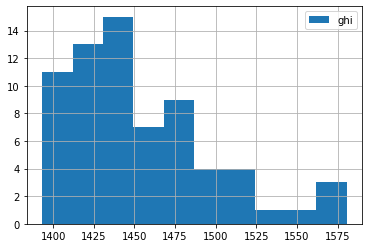

In [198]:
oie_GHIP_SPN1.ghi.hist(legend = True)

<AxesSubplot:>

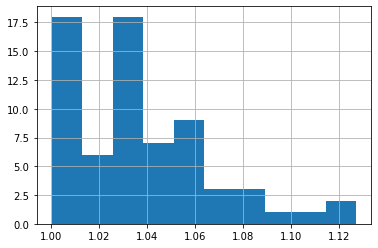

In [187]:
oie_GHIP_SPN1.kt.hist()

In [191]:
oie_GHIP_SPN1.delta

2018-01-11 15:46:00+00:00               NaT
2018-01-11 15:47:00+00:00   0 days 00:01:00
2018-01-11 15:48:00+00:00   0 days 00:01:00
2018-01-11 15:54:00+00:00   0 days 00:06:00
2018-01-11 15:55:00+00:00   0 days 00:01:00
                                  ...      
2018-12-15 14:33:00+00:00   0 days 00:01:00
2018-12-15 14:35:00+00:00   0 days 00:02:00
2018-12-15 14:36:00+00:00   0 days 00:01:00
2018-12-15 14:37:00+00:00   0 days 00:01:00
2018-12-15 14:38:00+00:00   0 days 00:01:00
Name: delta, Length: 68, dtype: timedelta64[ns]

In [197]:
oie_GHIP_SI02['ghi''kt'].hist()

KeyError: 'ghikt'

               ghi  flag         kt                       delta
count    53.000000  53.0  53.000000                          52
mean   1452.589443   0.0   1.034760   6 days 11:58:41.538461538
std      46.576814   0.0   0.030336  35 days 06:03:46.138838025
min    1388.333333   0.0   1.000314             0 days 00:01:00
25%    1416.433333   0.0   1.008634             0 days 00:01:00
50%    1442.583333   0.0   1.028902             0 days 00:15:00
75%    1490.716667   0.0   1.057099             2 days 00:05:00
max    1601.933333   0.0   1.134243           254 days 22:54:00


NameError: name 'khist' is not defined

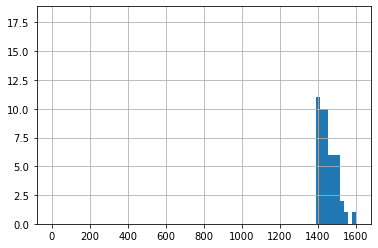

In [199]:

       print(oie_GHIT_SMP22.describe())
       ghihist = oie_GHIT_SMP22.ghi.hist()
       gfigname = 'GHIOIEminTSMP22' + year +'.jpeg'
       fig = ghihist.get_figure()
       fig.savefig(gfigname)
       kthist  = oie_GHIT_SMP22.kt.hist()
       kfigname = 'KtOIEminTSMP22' + year +'.jpeg'
       fig = khist.get_figure()
       fig.savefig(kfigname)

<AxesSubplot:>

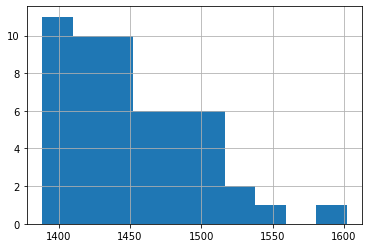

In [201]:
oie_GHIT_SMP22.ghi.hist()

In [205]:
ghibins = [1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900]


<AxesSubplot:>

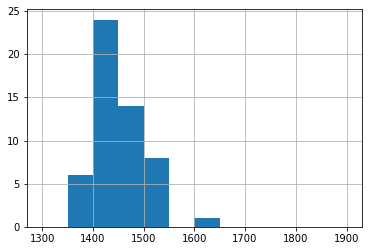

In [206]:
oie_GHIT_SMP22.ghi.hist(bins=ghibins)

<AxesSubplot:>

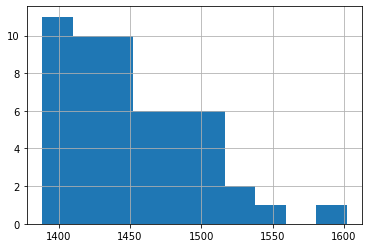

In [204]:
oie_GHIT_SMP22.ghi.hist(bins=10)

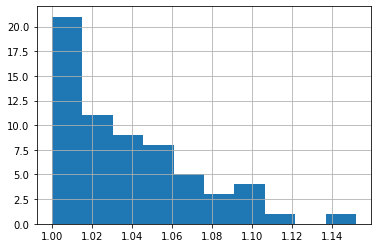

In [207]:
       khist  = oie_GHIP_SMP22.kt.hist()


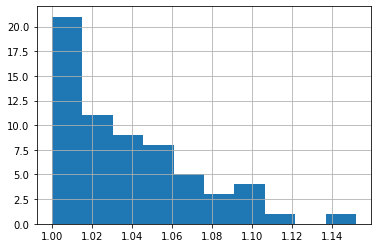

In [215]:
       ghihist = oie_GHIP_SMP22.ghi.hist()
       gfigname = 'GHIOIEminSMP22' + year +'.jpeg'
       fig = ghihist.get_figure()
       fig.savefig(gfigname)
       fig.clf()
        
       khist  = oie_GHIP_SMP22.kt.hist()
       kfigname = 'KtOIEminSMP22' + year +'.jpeg'
       fig = khist.get_figure()
       fig.savefig(kfigname)
       fig.clf()


<AxesSubplot:>

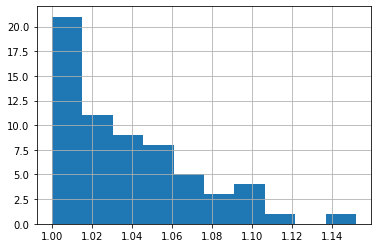

In [210]:
oie_GHIP_SMP22.kt.hist()

In [216]:
oie_GHIP_SI02

,ghi,flag,kt,delta
2018-01-11 15:46:00+00:00,1489.583333,0,1.054693,NaT
2018-01-11 15:47:00+00:00,1465.466667,0,1.037618,0 days 00:01:00
2018-01-11 15:48:00+00:00,1529.983333,0,1.083299,0 days 00:01:00
2018-01-11 15:54:00+00:00,1587.500000,0,1.124023,0 days 00:06:00
2018-01-11 15:55:00+00:00,1531.966667,0,1.084703,0 days 00:01:00
2018-01-11 16:02:00+00:00,1492.950000,0,1.057078,0 days 00:07:00
2018-01-15 15:20:00+00:00,1423.266667,0,1.008186,3 days 23:18:00
2018-01-15 15:27:00+00:00,1487.366667,0,1.053592,0 days 00:07:00
2018-01-15 16:04:00+00:00,1413.186441,0,1.001049,0 days 00:37:00
2018-01-15 16:07:00+00:00,1471.650000,0,1.042463,0 days 00:03:00


2018-01-11 15:46:00+00:00                 NaT
2018-01-11 15:47:00+00:00     0 days 00:01:00
2018-01-11 15:48:00+00:00     0 days 00:01:00
2018-01-11 15:54:00+00:00     0 days 00:06:00
2018-01-11 15:55:00+00:00     0 days 00:01:00
2018-01-11 16:02:00+00:00     0 days 00:07:00
2018-01-15 15:20:00+00:00     3 days 23:18:00
2018-01-15 15:21:00+00:00     0 days 00:01:00
2018-01-15 15:27:00+00:00     0 days 00:06:00
2018-01-15 16:04:00+00:00     0 days 00:37:00
2018-01-15 16:07:00+00:00     0 days 00:03:00
2018-01-15 16:09:00+00:00     0 days 00:02:00
2018-01-15 16:10:00+00:00     0 days 00:01:00
2018-01-16 15:03:00+00:00     0 days 22:53:00
2018-01-17 15:10:00+00:00     1 days 00:07:00
2018-01-17 15:25:00+00:00     0 days 00:15:00
2018-01-22 14:31:00+00:00     4 days 23:06:00
2018-02-03 16:08:00+00:00    12 days 01:37:00
2018-02-03 16:09:00+00:00     0 days 00:01:00
2018-02-08 15:06:00+00:00     4 days 22:57:00
2018-02-14 15:35:00+00:00     6 days 00:29:00
2018-02-16 15:02:00+00:00     1 da

In [219]:
oie_GHIT_SMP22.delta = oie_GHIT_SMP22.delta/np.timedelta64(1,"m")

/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [235]:
oie_GHIT_SMP22.delta[0] = 1.1

<ipython-input-235-f772fb82d0a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oie_GHIT_SMP22.delta[0] = 1.1
/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [236]:
oie_GHIT_SMP22.iloc[0,3] = 1.1

/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [231]:
oie_GHIT_SMP22['class'] 

,ghi,flag,kt,delta
2018-01-11 15:46:00+00:00,1508.366667,0,1.067993,1.0
2018-01-11 15:47:00+00:00,1478.016667,0,1.046504,1.0
2018-01-11 15:48:00+00:00,1528.950000,0,1.082567,1.0
2018-01-11 15:54:00+00:00,1601.933333,0,1.134243,6.0
2018-01-11 15:55:00+00:00,1543.733333,0,1.093035,1.0
2018-01-11 16:02:00+00:00,1508.083333,0,1.067793,7.0
2018-01-15 15:20:00+00:00,1430.466667,0,1.013286,5718.0
2018-01-15 15:21:00+00:00,1416.433333,0,1.003346,1.0
2018-01-15 15:27:00+00:00,1499.483333,0,1.062175,6.0
2018-01-15 16:04:00+00:00,1429.322034,0,1.012479,37.0


In [232]:
oie_GHIT_SMP22.dtypes

ghi      float64
flag       int64
kt       float64
delta    float64
dtype: object

In [237]:
oie_GHIT_SMP22['start'] = (oie_GHIT_SMP22.delta > 1 )

<ipython-input-237-a0d0b6f11eaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oie_GHIT_SMP22['start'] = (oie_GHIT_SMP22.delta > 1 )


In [238]:
oie_GHIT_SMP22

,ghi,flag,kt,delta,start
2018-01-11 15:46:00+00:00,1508.366667,0,1.067993,1.1,True
2018-01-11 15:47:00+00:00,1478.016667,0,1.046504,1.0,False
2018-01-11 15:48:00+00:00,1528.950000,0,1.082567,1.0,False
2018-01-11 15:54:00+00:00,1601.933333,0,1.134243,6.0,True
2018-01-11 15:55:00+00:00,1543.733333,0,1.093035,1.0,False
2018-01-11 16:02:00+00:00,1508.083333,0,1.067793,7.0,True
2018-01-15 15:20:00+00:00,1430.466667,0,1.013286,5718.0,True
2018-01-15 15:21:00+00:00,1416.433333,0,1.003346,1.0,False
2018-01-15 15:27:00+00:00,1499.483333,0,1.062175,6.0,True
2018-01-15 16:04:00+00:00,1429.322034,0,1.012479,37.0,True


In [239]:
       GHIP_SPN1 = pd.DataFrame(columns = ['ghi', 'flag', 'kt', 'delta', 'isstart', 'isend'])


In [242]:
       GHIP_SPN1['ghi']  = dfghi['GHIP_SPN1']
       GHIP_SPN1['flag'] = dfghi['F_GHIP_SPN1']
       GHIP_SPN1['kt']   = dfghi['kt_GHIP_SPN1']
       GHIP_SPN1 = GHIP_SPN1[GHIP_SPN1.flag <4]

In [246]:
       oie_GHIP_SPN1.loc[:,'delta'] = oie_GHIP_SPN1.index.to_series().diff()/np.timedelta64(1,"m")
       oie_GHIP_SPN1.iloc[0,3] = 1.1


In [247]:
         oie_GHIP_SPN1.loc[:,'start'] = (oie_GHIP_SPN1.delta > 1 )


In [248]:
oie_GHIP_SPN1

,ghi,flag,kt,delta,start
2018-01-11 15:46:00+00:00,1452.133333,0,1.028177,1.1,True
2018-01-11 15:47:00+00:00,1444.150000,0,1.022524,1.0,False
2018-01-11 15:48:00+00:00,1514.050000,0,1.072017,1.0,False
2018-01-11 15:54:00+00:00,1562.400000,0,1.106251,6.0,True
2018-01-11 15:55:00+00:00,1525.716667,0,1.080278,1.0,False
...,...,...,...,...,...
2018-12-15 14:33:00+00:00,1495.083333,0,1.060149,1.0,False
2018-12-15 14:35:00+00:00,1523.066667,0,1.079991,2.0,True
2018-12-15 14:36:00+00:00,1549.883333,0,1.099006,1.0,False
2018-12-15 14:37:00+00:00,1510.700000,0,1.071222,1.0,False


In [251]:
       oie_GHIP_SPN1.loc[:,'end'] = oie_GHIP_SPN1.start.shift(-1)


In [253]:
oie_GHIP_SPN1.head(20)

,ghi,flag,kt,delta,start,end
2018-01-11 15:46:00+00:00,1452.133333,0,1.028177,1.1,True,False
2018-01-11 15:47:00+00:00,1444.150000,0,1.022524,1.0,False,False
2018-01-11 15:48:00+00:00,1514.050000,0,1.072017,1.0,False,True
2018-01-11 15:54:00+00:00,1562.400000,0,1.106251,6.0,True,False
2018-01-11 15:55:00+00:00,1525.716667,0,1.080278,1.0,False,True
2018-01-11 16:02:00+00:00,1502.500000,0,1.063840,7.0,True,True
2018-01-15 15:27:00+00:00,1450.116667,0,1.027206,5725.0,True,True
2018-01-15 16:07:00+00:00,1485.383333,0,1.052191,40.0,True,True
2018-01-15 16:09:00+00:00,1475.733333,0,1.045356,2.0,True,False
2018-01-15 16:10:00+00:00,1485.233333,0,1.052085,1.0,False,True


In [255]:
oie_GHIP_SPN1.start.value_counts()

True     50
False    18
Name: start, dtype: int64

In [274]:
oie_GHIP_SPN1.end.value_counts()

True     50
False    18
Name: end, dtype: int64

In [268]:
oie_GHIP_SPN1.tail()

,ghi,flag,kt,delta,start,end
2018-12-15 14:33:00+00:00,1495.083333,0,1.060149,1.0,False,True
2018-12-15 14:35:00+00:00,1523.066667,0,1.079991,2.0,True,False
2018-12-15 14:36:00+00:00,1549.883333,0,1.099006,1.0,False,False
2018-12-15 14:37:00+00:00,1510.700000,0,1.071222,1.0,False,False
2018-12-15 14:38:00+00:00,1580.450000,0,1.120681,1.0,False,True


In [273]:
oie_GHIP_SPN1.iloc[-1,5]

True

In [367]:
       events = pd.DataFrame(columns = ['start', 'end', 'duration', 'ibe', 'min', 'max', 'average'])


In [368]:
events.start = oie_GHIP_SPN1.loc[oie_GHIP_SPN1.start == True].index

In [369]:
events.end = oie_GHIP_SPN1.loc[oie_GHIP_SPN1.end == True].index

In [370]:
events

,start,end,duration,ibe,min,max,average
0,2018-01-11 15:46:00+00:00,2018-01-11 15:48:00+00:00,NaN,NaN,NaN,NaN,NaN
1,2018-01-11 15:54:00+00:00,2018-01-11 15:55:00+00:00,NaN,NaN,NaN,NaN,NaN
2,2018-01-11 16:02:00+00:00,2018-01-11 16:02:00+00:00,NaN,NaN,NaN,NaN,NaN
3,2018-01-15 15:27:00+00:00,2018-01-15 15:27:00+00:00,NaN,NaN,NaN,NaN,NaN
4,2018-01-15 16:07:00+00:00,2018-01-15 16:07:00+00:00,NaN,NaN,NaN,NaN,NaN
5,2018-01-15 16:09:00+00:00,2018-01-15 16:10:00+00:00,NaN,NaN,NaN,NaN,NaN
6,2018-01-17 15:25:00+00:00,2018-01-17 15:25:00+00:00,NaN,NaN,NaN,NaN,NaN
7,2018-01-22 14:31:00+00:00,2018-01-22 14:31:00+00:00,NaN,NaN,NaN,NaN,NaN
8,2018-02-03 16:08:00+00:00,2018-02-03 16:08:00+00:00,NaN,NaN,NaN,NaN,NaN
9,2018-02-14 15:35:00+00:00,2018-02-14 15:35:00+00:00,NaN,NaN,NaN,NaN,NaN


In [283]:
events.start - events.start.shift(-1)

0      -1 days +23:52:00
1      -1 days +23:52:00
2      -4 days +00:35:00
3      -1 days +23:20:00
4      -1 days +23:58:00
5      -2 days +00:44:00
6      -5 days +00:54:00
7     -13 days +22:23:00
8     -11 days +00:33:00
9      -2 days +00:32:00
10    -20 days +00:35:00
11   -235 days +00:30:00
12    -10 days +22:48:00
13     -1 days +23:48:00
14     -1 days +23:39:00
15     -1 days +01:29:00
16     -1 days +23:27:00
17     -1 days +23:52:00
18     -1 days +23:05:00
19     -1 days +01:32:00
20     -1 days +23:26:00
21     -1 days +23:55:00
22     -1 days +23:57:00
23     -1 days +23:43:00
24     -1 days +23:45:00
25     -1 days +23:36:00
26     -1 days +02:17:00
27     -2 days +23:40:00
28     -1 days +23:52:00
29     -1 days +23:53:00
30     -1 days +23:57:00
31     -1 days +23:35:00
32     -4 days +00:19:00
33     -1 days +23:51:00
34     -1 days +23:41:00
35     -5 days +23:20:00
36     -1 days +23:28:00
37     -1 days +02:16:00
38     -4 days +00:25:00
39     -2 days +23:41:00


In [371]:
events.duration = events.end  - events.start

In [372]:
events.ibe = events.start - events.start.shift(+1)

In [373]:
events

,start,end,duration,ibe,min,max,average
0,2018-01-11 15:46:00+00:00,2018-01-11 15:48:00+00:00,0 days 00:02:00,NaT,NaN,NaN,NaN
1,2018-01-11 15:54:00+00:00,2018-01-11 15:55:00+00:00,0 days 00:01:00,0 days 00:08:00,NaN,NaN,NaN
2,2018-01-11 16:02:00+00:00,2018-01-11 16:02:00+00:00,0 days 00:00:00,0 days 00:08:00,NaN,NaN,NaN
3,2018-01-15 15:27:00+00:00,2018-01-15 15:27:00+00:00,0 days 00:00:00,3 days 23:25:00,NaN,NaN,NaN
4,2018-01-15 16:07:00+00:00,2018-01-15 16:07:00+00:00,0 days 00:00:00,0 days 00:40:00,NaN,NaN,NaN
5,2018-01-15 16:09:00+00:00,2018-01-15 16:10:00+00:00,0 days 00:01:00,0 days 00:02:00,NaN,NaN,NaN
6,2018-01-17 15:25:00+00:00,2018-01-17 15:25:00+00:00,0 days 00:00:00,1 days 23:16:00,NaN,NaN,NaN
7,2018-01-22 14:31:00+00:00,2018-01-22 14:31:00+00:00,0 days 00:00:00,4 days 23:06:00,NaN,NaN,NaN
8,2018-02-03 16:08:00+00:00,2018-02-03 16:08:00+00:00,0 days 00:00:00,12 days 01:37:00,NaN,NaN,NaN
9,2018-02-14 15:35:00+00:00,2018-02-14 15:35:00+00:00,0 days 00:00:00,10 days 23:27:00,NaN,NaN,NaN


In [296]:
oie_GHIP_SPN1.loc['2018-12-15 14:29:00+00:00':'2018-12-15 14:33:00+00:00','ghi'].max()

1495.0833333333333

In [297]:
oie_GHIP_SPN1.loc['2018-12-15 14:29:00+00:00':'2018-12-15 14:33:00+00:00','ghi'].mean()

1474.5566666666666

In [299]:
events.loc[:,'max'] = oie_GHIP_SPN1.loc[events.start:events.end,'ghi'].max()

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [0    2018-01-11 15:46:00+00:00
1    2018-01-11 15:54:00+00:00
2    2018-01-11 16:02:00+00:00
3    2018-01-15 15:27:00+00:00
4    2018-01-15 16:07:00+00:00
5    2018-01-15 16:09:00+00:00
6    2018-01-17 15:25:00+00:00
7    2018-01-22 14:31:00+00:00
8    2018-02-03 16:08:00+00:00
9    2018-02-14 15:35:00+00:00
10   2018-02-16 15:03:00+00:00
11   2018-03-08 14:28:00+00:00
12   2018-10-29 13:58:00+00:00
13   2018-11-07 15:10:00+00:00
14   2018-11-07 15:22:00+00:00
15   2018-11-07 15:43:00+00:00
16   2018-11-08 14:14:00+00:00
17   2018-11-08 14:47:00+00:00
18   2018-11-08 14:55:00+00:00
19   2018-11-08 15:50:00+00:00
20   2018-11-09 14:18:00+00:00
21   2018-11-09 14:52:00+00:00
22   2018-11-09 14:57:00+00:00
23   2018-11-09 15:00:00+00:00
24   2018-11-09 15:17:00+00:00
25   2018-11-09 15:32:00+00:00
26   2018-11-09 15:56:00+00:00
27   2018-11-10 13:39:00+00:00
28   2018-11-11 13:59:00+00:00
29   2018-11-11 14:07:00+00:00
30   2018-11-11 14:14:00+00:00
31   2018-11-11 14:17:00+00:00
32   2018-11-11 14:42:00+00:00
33   2018-11-15 14:23:00+00:00
34   2018-11-15 14:32:00+00:00
35   2018-11-15 14:51:00+00:00
36   2018-11-19 15:31:00+00:00
37   2018-11-19 16:03:00+00:00
38   2018-11-20 13:47:00+00:00
39   2018-11-24 13:22:00+00:00
40   2018-11-25 13:41:00+00:00
41   2018-11-27 15:40:00+00:00
42   2018-11-27 15:53:00+00:00
43   2018-12-06 15:50:00+00:00
44   2018-12-06 16:00:00+00:00
45   2018-12-06 16:12:00+00:00
46   2018-12-07 15:23:00+00:00
47   2018-12-15 14:26:00+00:00
48   2018-12-15 14:29:00+00:00
49   2018-12-15 14:35:00+00:00
Name: start, dtype: datetime64[ns, Etc/GMT]] of type Series

In [315]:
df1 = events.loc[:,'start':'end']

In [316]:
df = df1.copy()

In [317]:
df1['list']=df1.apply(lambda x : pd.date_range(start =x['start'],end=x['end'],freq='m').tolist(),axis=1)
df1=df1['list'].apply(pd.Series).stack().to_frame().rename(columns={0:'Date'})
df1['value']=df1.Date.map(oie_GHIP_SPN1.ghi)
df1.groupby(level=0).mean()

,Date,value


In [308]:
df1

,start,end,list
0,2018-01-11 15:46:00+00:00,2018-01-11 15:48:00+00:00,[]
1,2018-01-11 15:54:00+00:00,2018-01-11 15:55:00+00:00,[]
2,2018-01-11 16:02:00+00:00,2018-01-11 16:02:00+00:00,[]
3,2018-01-15 15:27:00+00:00,2018-01-15 15:27:00+00:00,[]
4,2018-01-15 16:07:00+00:00,2018-01-15 16:07:00+00:00,[]
5,2018-01-15 16:09:00+00:00,2018-01-15 16:10:00+00:00,[]
6,2018-01-17 15:25:00+00:00,2018-01-17 15:25:00+00:00,[]
7,2018-01-22 14:31:00+00:00,2018-01-22 14:31:00+00:00,[]
8,2018-02-03 16:08:00+00:00,2018-02-03 16:08:00+00:00,[]
9,2018-02-14 15:35:00+00:00,2018-02-14 15:35:00+00:00,[]


In [309]:
df1=df1['list'].apply(pd.Series).stack().to_frame().rename(columns={0:'Date'})


In [311]:
df1.shape

(0, 1)

In [312]:
df1['value']=df1.Date.map(oie_GHIP_SPN1.ghi)
df1.groupby(level=0).mean()

,Date,value


In [313]:
pd.concat([df,df1.groupby(level=0).mean()],axis=1)


,start,end,list,Date,value
0,2018-01-11 15:46:00+00:00,2018-01-11 15:48:00+00:00,[],NaN,NaN
1,2018-01-11 15:54:00+00:00,2018-01-11 15:55:00+00:00,[],NaN,NaN
2,2018-01-11 16:02:00+00:00,2018-01-11 16:02:00+00:00,[],NaN,NaN
3,2018-01-15 15:27:00+00:00,2018-01-15 15:27:00+00:00,[],NaN,NaN
4,2018-01-15 16:07:00+00:00,2018-01-15 16:07:00+00:00,[],NaN,NaN
5,2018-01-15 16:09:00+00:00,2018-01-15 16:10:00+00:00,[],NaN,NaN
6,2018-01-17 15:25:00+00:00,2018-01-17 15:25:00+00:00,[],NaN,NaN
7,2018-01-22 14:31:00+00:00,2018-01-22 14:31:00+00:00,[],NaN,NaN
8,2018-02-03 16:08:00+00:00,2018-02-03 16:08:00+00:00,[],NaN,NaN
9,2018-02-14 15:35:00+00:00,2018-02-14 15:35:00+00:00,[],NaN,NaN


In [ ]:
meanInterestRate = numpy.mean(df.loc[(df["startDate"] > someDate)&(df["endDate"] < someOtherDate),"interestRate"])


In [337]:
df1 = events.loc[:,'start': 'end']

In [338]:
df1

,start,end
0,2018-01-11 15:46:00+00:00,2018-01-11 15:48:00+00:00
1,2018-01-11 15:54:00+00:00,2018-01-11 15:55:00+00:00
2,2018-01-11 16:02:00+00:00,2018-01-11 16:02:00+00:00
3,2018-01-15 15:27:00+00:00,2018-01-15 15:27:00+00:00
4,2018-01-15 16:07:00+00:00,2018-01-15 16:07:00+00:00
5,2018-01-15 16:09:00+00:00,2018-01-15 16:10:00+00:00
6,2018-01-17 15:25:00+00:00,2018-01-17 15:25:00+00:00
7,2018-01-22 14:31:00+00:00,2018-01-22 14:31:00+00:00
8,2018-02-03 16:08:00+00:00,2018-02-03 16:08:00+00:00
9,2018-02-14 15:35:00+00:00,2018-02-14 15:35:00+00:00


In [330]:
df2 = pd.DataFrame(columns = ['rates'])

df2['rates'] = oie_GHIP_SPN1['ghi']

In [331]:
df2.dtypes

rates    float64
dtype: object

In [332]:
df2

,rates
2018-01-11 15:46:00+00:00,1452.133333
2018-01-11 15:47:00+00:00,1444.150000
2018-01-11 15:48:00+00:00,1514.050000
2018-01-11 15:54:00+00:00,1562.400000
2018-01-11 15:55:00+00:00,1525.716667
...,...
2018-12-15 14:33:00+00:00,1495.083333
2018-12-15 14:35:00+00:00,1523.066667
2018-12-15 14:36:00+00:00,1549.883333
2018-12-15 14:37:00+00:00,1510.700000


In [339]:
df=df1.copy()#keep the original df1
df1['list']=df1.apply(lambda x : pd.date_range(start =x['start'],end=x['end'],freq='min').tolist(),axis=1)


In [340]:
df1

,start,end,list
0,2018-01-11 15:46:00+00:00,2018-01-11 15:48:00+00:00,"[2018-01-11 15:46:00+00:00, 2018-01-11 15:47:0..."
1,2018-01-11 15:54:00+00:00,2018-01-11 15:55:00+00:00,"[2018-01-11 15:54:00+00:00, 2018-01-11 15:55:0..."
2,2018-01-11 16:02:00+00:00,2018-01-11 16:02:00+00:00,[2018-01-11 16:02:00+00:00]
3,2018-01-15 15:27:00+00:00,2018-01-15 15:27:00+00:00,[2018-01-15 15:27:00+00:00]
4,2018-01-15 16:07:00+00:00,2018-01-15 16:07:00+00:00,[2018-01-15 16:07:00+00:00]
5,2018-01-15 16:09:00+00:00,2018-01-15 16:10:00+00:00,"[2018-01-15 16:09:00+00:00, 2018-01-15 16:10:0..."
6,2018-01-17 15:25:00+00:00,2018-01-17 15:25:00+00:00,[2018-01-17 15:25:00+00:00]
7,2018-01-22 14:31:00+00:00,2018-01-22 14:31:00+00:00,[2018-01-22 14:31:00+00:00]
8,2018-02-03 16:08:00+00:00,2018-02-03 16:08:00+00:00,[2018-02-03 16:08:00+00:00]
9,2018-02-14 15:35:00+00:00,2018-02-14 15:35:00+00:00,[2018-02-14 15:35:00+00:00]


In [341]:
df1=df1['list'].apply(pd.Series).stack().to_frame().rename(columns={0:'Date'})


In [342]:
df1

Date
0  0 2018-01-11 15:46:00+00:00
   1 2018-01-11 15:47:00+00:00
   2 2018-01-11 15:48:00+00:00
1  0 2018-01-11 15:54:00+00:00
   1 2018-01-11 15:55:00+00:00
...                        ...
48 4 2018-12-15 14:33:00+00:00
49 0 2018-12-15 14:35:00+00:00
   1 2018-12-15 14:36:00+00:00
   2 2018-12-15 14:37:00+00:00
   3 2018-12-15 14:38:00+00:00

[68 rows x 1 columns]

In [344]:
df1['value']=df1.Date.map(df2.rates)
df1.groupby(level=0).mean()

,value
0,1470.111111
1,1544.058333
2,1502.500000
3,1450.116667
4,1485.383333
5,1480.483333
6,1435.783333
7,1466.650000
8,1413.983871
9,1469.836066


In [365]:
m = df1.groupby(level=0).mean()

In [366]:
m

,value
0,1470.111111
1,1544.058333
2,1502.500000
3,1450.116667
4,1485.383333
5,1480.483333
6,1435.783333
7,1466.650000
8,1413.983871
9,1469.836066


In [345]:
df1

Date        value
0  0 2018-01-11 15:46:00+00:00  1452.133333
   1 2018-01-11 15:47:00+00:00  1444.150000
   2 2018-01-11 15:48:00+00:00  1514.050000
1  0 2018-01-11 15:54:00+00:00  1562.400000
   1 2018-01-11 15:55:00+00:00  1525.716667
...                        ...          ...
48 4 2018-12-15 14:33:00+00:00  1495.083333
49 0 2018-12-15 14:35:00+00:00  1523.066667
   1 2018-12-15 14:36:00+00:00  1549.883333
   2 2018-12-15 14:37:00+00:00  1510.700000
   3 2018-12-15 14:38:00+00:00  1580.450000

[68 rows x 2 columns]

In [351]:
pd.concat([events,df1.groupby(level=0).mean()],axis=1)


,start,end,duration,ibe,min,max,average,value
0,2018-01-11 15:46:00+00:00,2018-01-11 15:48:00+00:00,0 days 00:02:00,NaT,NaN,NaN,NaN,1470.111111
1,2018-01-11 15:54:00+00:00,2018-01-11 15:55:00+00:00,0 days 00:01:00,0 days 00:08:00,NaN,NaN,NaN,1544.058333
2,2018-01-11 16:02:00+00:00,2018-01-11 16:02:00+00:00,0 days 00:00:00,0 days 00:08:00,NaN,NaN,NaN,1502.500000
3,2018-01-15 15:27:00+00:00,2018-01-15 15:27:00+00:00,0 days 00:00:00,3 days 23:25:00,NaN,NaN,NaN,1450.116667
4,2018-01-15 16:07:00+00:00,2018-01-15 16:07:00+00:00,0 days 00:00:00,0 days 00:40:00,NaN,NaN,NaN,1485.383333
5,2018-01-15 16:09:00+00:00,2018-01-15 16:10:00+00:00,0 days 00:01:00,0 days 00:02:00,NaN,NaN,NaN,1480.483333
6,2018-01-17 15:25:00+00:00,2018-01-17 15:25:00+00:00,0 days 00:00:00,1 days 23:16:00,NaN,NaN,NaN,1435.783333
7,2018-01-22 14:31:00+00:00,2018-01-22 14:31:00+00:00,0 days 00:00:00,4 days 23:06:00,NaN,NaN,NaN,1466.650000
8,2018-02-03 16:08:00+00:00,2018-02-03 16:08:00+00:00,0 days 00:00:00,12 days 01:37:00,NaN,NaN,NaN,1413.983871
9,2018-02-14 15:35:00+00:00,2018-02-14 15:35:00+00:00,0 days 00:00:00,10 days 23:27:00,NaN,NaN,NaN,1469.836066


In [353]:
events.average = df1.groupby(level=0).mean()

In [354]:
events

,start,end,duration,ibe,min,max,average
0,2018-01-11 15:46:00+00:00,2018-01-11 15:48:00+00:00,0 days 00:02:00,NaT,NaN,NaN,1470.111111
1,2018-01-11 15:54:00+00:00,2018-01-11 15:55:00+00:00,0 days 00:01:00,0 days 00:08:00,NaN,NaN,1544.058333
2,2018-01-11 16:02:00+00:00,2018-01-11 16:02:00+00:00,0 days 00:00:00,0 days 00:08:00,NaN,NaN,1502.500000
3,2018-01-15 15:27:00+00:00,2018-01-15 15:27:00+00:00,0 days 00:00:00,3 days 23:25:00,NaN,NaN,1450.116667
4,2018-01-15 16:07:00+00:00,2018-01-15 16:07:00+00:00,0 days 00:00:00,0 days 00:40:00,NaN,NaN,1485.383333
5,2018-01-15 16:09:00+00:00,2018-01-15 16:10:00+00:00,0 days 00:01:00,0 days 00:02:00,NaN,NaN,1480.483333
6,2018-01-17 15:25:00+00:00,2018-01-17 15:25:00+00:00,0 days 00:00:00,1 days 23:16:00,NaN,NaN,1435.783333
7,2018-01-22 14:31:00+00:00,2018-01-22 14:31:00+00:00,0 days 00:00:00,4 days 23:06:00,NaN,NaN,1466.650000
8,2018-02-03 16:08:00+00:00,2018-02-03 16:08:00+00:00,0 days 00:00:00,12 days 01:37:00,NaN,NaN,1413.983871
9,2018-02-14 15:35:00+00:00,2018-02-14 15:35:00+00:00,0 days 00:00:00,10 days 23:27:00,NaN,NaN,1469.836066


In [362]:
events['min'] = df1.groupby(level=0).min()

In [360]:
events.max = df1.groupby(level=0).max()

In [364]:
df1.groupby(level=0).min()

,Date,value
0,2018-01-11 15:46:00+00:00,1444.150000
1,2018-01-11 15:54:00+00:00,1525.716667
2,2018-01-11 16:02:00+00:00,1502.500000
3,2018-01-15 15:27:00+00:00,1450.116667
4,2018-01-15 16:07:00+00:00,1485.383333
5,2018-01-15 16:09:00+00:00,1475.733333
6,2018-01-17 15:25:00+00:00,1435.783333
7,2018-01-22 14:31:00+00:00,1466.650000
8,2018-02-03 16:08:00+00:00,1413.983871
9,2018-02-14 15:35:00+00:00,1469.836066


In [358]:
df1.groupby(level=0).min()

,Date,value
0,2018-01-11 15:46:00+00:00,1444.150000
1,2018-01-11 15:54:00+00:00,1525.716667
2,2018-01-11 16:02:00+00:00,1502.500000
3,2018-01-15 15:27:00+00:00,1450.116667
4,2018-01-15 16:07:00+00:00,1485.383333
5,2018-01-15 16:09:00+00:00,1475.733333
6,2018-01-17 15:25:00+00:00,1435.783333
7,2018-01-22 14:31:00+00:00,1466.650000
8,2018-02-03 16:08:00+00:00,1413.983871
9,2018-02-14 15:35:00+00:00,1469.836066


In [375]:
avg = df1.groupby(level=0).mean()
min = df1.groupby(level=0).min()
max = df1.groupby(level=0).max()

In [386]:
min

,Date,value
0,2018-01-11 15:46:00+00:00,1444.150000
1,2018-01-11 15:54:00+00:00,1525.716667
2,2018-01-11 16:02:00+00:00,1502.500000
3,2018-01-15 15:27:00+00:00,1450.116667
4,2018-01-15 16:07:00+00:00,1485.383333
5,2018-01-15 16:09:00+00:00,1475.733333
6,2018-01-17 15:25:00+00:00,1435.783333
7,2018-01-22 14:31:00+00:00,1466.650000
8,2018-02-03 16:08:00+00:00,1413.983871
9,2018-02-14 15:35:00+00:00,1469.836066


In [383]:
df1.head(20)

Date        value
0  0 2018-01-11 15:46:00+00:00  1452.133333
   1 2018-01-11 15:47:00+00:00  1444.150000
   2 2018-01-11 15:48:00+00:00  1514.050000
1  0 2018-01-11 15:54:00+00:00  1562.400000
   1 2018-01-11 15:55:00+00:00  1525.716667
2  0 2018-01-11 16:02:00+00:00  1502.500000
3  0 2018-01-15 15:27:00+00:00  1450.116667
4  0 2018-01-15 16:07:00+00:00  1485.383333
5  0 2018-01-15 16:09:00+00:00  1475.733333
   1 2018-01-15 16:10:00+00:00  1485.233333
6  0 2018-01-17 15:25:00+00:00  1435.783333
7  0 2018-01-22 14:31:00+00:00  1466.650000
8  0 2018-02-03 16:08:00+00:00  1413.983871
9  0 2018-02-14 15:35:00+00:00  1469.836066
10 0 2018-02-16 15:03:00+00:00  1409.366667
   1 2018-02-16 15:04:00+00:00  1442.850000
11 0 2018-03-08 14:28:00+00:00  1396.491525
12 0 2018-10-29 13:58:00+00:00  1437.666667
13 0 2018-11-07 15:10:00+00:00  1431.383333
14 0 2018-11-07 15:22:00+00:00  1427.600000

In [385]:
max

,Date,value
0,2018-01-11 15:48:00+00:00,1514.050000
1,2018-01-11 15:55:00+00:00,1562.400000
2,2018-01-11 16:02:00+00:00,1502.500000
3,2018-01-15 15:27:00+00:00,1450.116667
4,2018-01-15 16:07:00+00:00,1485.383333
5,2018-01-15 16:10:00+00:00,1485.233333
6,2018-01-17 15:25:00+00:00,1435.783333
7,2018-01-22 14:31:00+00:00,1466.650000
8,2018-02-03 16:08:00+00:00,1413.983871
9,2018-02-14 15:35:00+00:00,1469.836066


In [387]:
avg

,value
0,1470.111111
1,1544.058333
2,1502.500000
3,1450.116667
4,1485.383333
5,1480.483333
6,1435.783333
7,1466.650000
8,1413.983871
9,1469.836066


In [394]:
events['min'] = min['value']

In [395]:
events

,start,end,duration,ibe,min,max,average
0,2018-01-11 15:46:00+00:00,2018-01-11 15:48:00+00:00,0 days 00:02:00,NaT,1444.150000,NaN,NaN
1,2018-01-11 15:54:00+00:00,2018-01-11 15:55:00+00:00,0 days 00:01:00,0 days 00:08:00,1525.716667,NaN,NaN
2,2018-01-11 16:02:00+00:00,2018-01-11 16:02:00+00:00,0 days 00:00:00,0 days 00:08:00,1502.500000,NaN,NaN
3,2018-01-15 15:27:00+00:00,2018-01-15 15:27:00+00:00,0 days 00:00:00,3 days 23:25:00,1450.116667,NaN,NaN
4,2018-01-15 16:07:00+00:00,2018-01-15 16:07:00+00:00,0 days 00:00:00,0 days 00:40:00,1485.383333,NaN,NaN
5,2018-01-15 16:09:00+00:00,2018-01-15 16:10:00+00:00,0 days 00:01:00,0 days 00:02:00,1475.733333,NaN,NaN
6,2018-01-17 15:25:00+00:00,2018-01-17 15:25:00+00:00,0 days 00:00:00,1 days 23:16:00,1435.783333,NaN,NaN
7,2018-01-22 14:31:00+00:00,2018-01-22 14:31:00+00:00,0 days 00:00:00,4 days 23:06:00,1466.650000,NaN,NaN
8,2018-02-03 16:08:00+00:00,2018-02-03 16:08:00+00:00,0 days 00:00:00,12 days 01:37:00,1413.983871,NaN,NaN
9,2018-02-14 15:35:00+00:00,2018-02-14 15:35:00+00:00,0 days 00:00:00,10 days 23:27:00,1469.836066,NaN,NaN
